# Correlatie

We maken een scatterplot van de data.

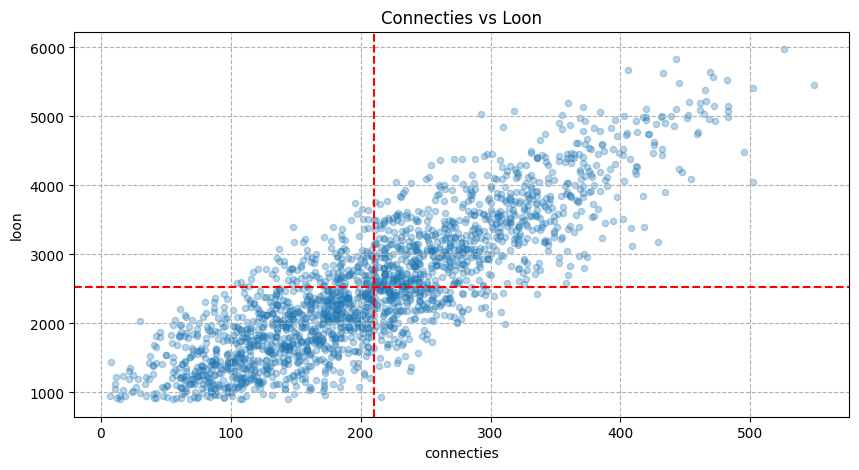

In [1]:
import pandas as pd

linkedin = pd.read_csv('datasets/linkedin.csv')
ax = linkedin.plot(kind='scatter', x='connecties', y='loon',
                   figsize=(10, 5), title='Connecties vs Loon',
                   marker='o', alpha=0.3)
ax.grid(linestyle='--')
ax.axhline(y=linkedin.loon.mean(), color='r', linestyle='--')
_ = ax.axvline(x=linkedin.connecties.mean(), color='r', linestyle='--')

# Correlatiecoefficient $r_{xy}$

Hoe sterk is het verband tussen de connecties (X) en het loon (Y)?
Kunnen we hier een **getal** opkleven? Een maat voor hoe **sterk** dit verband is?

Algemeen: hoe sterk is het verband tussen twee variabelen X en Y?

## Standardisering

Eerst gaan we de variabelen X en Y omzetten naar standaardscores, dus $Z_x$ en $Z_y$ berekenen.

In [3]:
# manueel
x = linkedin.connecties
y = linkedin.loon
zx = (x - x.mean()) / x.std()
zy = (y - y.mean()) / y.std()

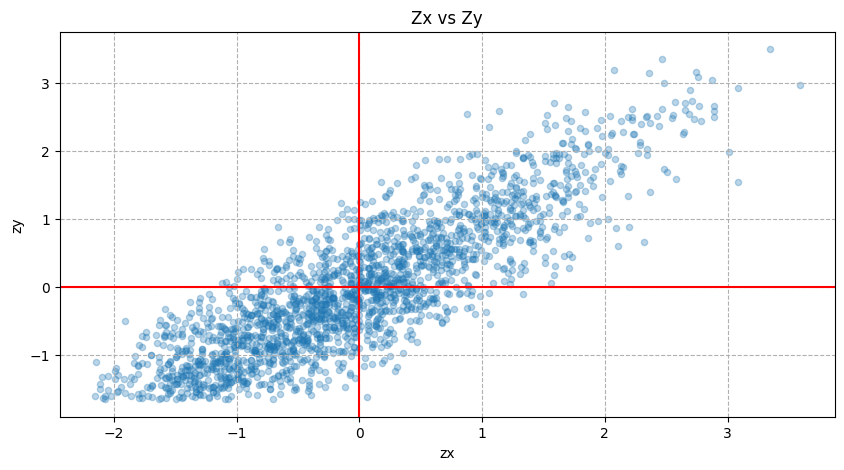

In [9]:
import scipy.stats as stats

# omzetten met stats.zscore
zx = stats.zscore(x)
zy = stats.zscore(y)

linkedin_standard = pd.DataFrame({'zx': zx, 'zy': zy})

ax = linkedin_standard.plot(kind='scatter', x='zx', y='zy',
                            figsize=(10, 5), title='Zx vs Zy',
                            marker='o', alpha=0.3)
ax.grid(linestyle='--')
ax.axvline(x=0, color='r', linestyle='-')
_ = ax.axhline(y=0, color='r', linestyle='-')


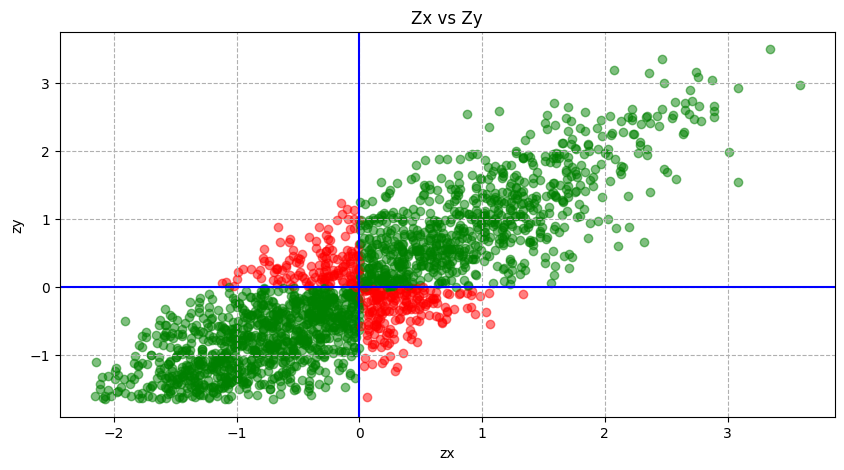

In [10]:
# deze berekening duurt ongeveer 1 minuut
from matplotlib import pyplot as plt

colors = ['g' if z >= 0 else 'r' for z in zx * zy]
fig, ax = plt.subplots(figsize=(10, 5))
for i, (x, y) in enumerate(zip(zx, zy)):
    ax.scatter(x, y, c=colors[i], alpha=0.5)
ax.grid(linestyle='--')
ax.set_xlabel('zx')
ax.set_ylabel('zy')
ax.set_title('Zx vs Zy')
ax.axvline(x=0, color='b', linestyle='-')
_ = ax.axhline(y=0, color='b', linestyle='-')


## Correlatiecoefficient berekenen met Python
Kan berekend worden met Pandas met de functie `corr()`


In [24]:
import numpy as np
from scipy.stats import pearsonr

# bereken correlatie met Pandas op linkedin
linkedin.corr()

# bereken correlatie met Numpy op linkedin
corr = np.corrcoef(linkedin.connecties, linkedin.loon)[0, 1]

# bereken correlatie met Scipy op linkedin
pearsonr(linkedin.connecties, linkedin.loon)


(0.8546038926852264, 0.0)

## Rangcorrelatiecoefficient

In [14]:
linkedin.corr(method='kendall')
linkedin.corr(method='spearman')

loon  connecties
loon        1.000000    0.839348
connecties  0.839348    1.000000

# Lineare regressie
Zoeken naar de rechte die het beste bij de data "past".
Wat betekent dit hier?


## Regressie met Sci-kit Learn
We installeren een nieuwe library: `scikit-learn`.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = linkedin[['connecties']]  # 2D array
y = linkedin.loon  # 1D array

In [28]:
model.fit(X, y)  # trainen van het model

LinearRegression()

In [41]:
X_new = pd.DataFrame({'connecties': [437, 500, 15]})
model.predict(X_new)

array([4546.65254388, 5108.17557463,  785.33954427])

In [46]:
y_hat = model.predict(linkedin[['connecties']])  # voorspellingen maken
y_hat

array([3361.21503453, 2576.86540428, 2068.82075741, ..., 4751.65301542,
       4323.82594438, 4395.13045622])

In [52]:
df = pd.DataFrame(zip(y, y_hat, y - y_hat, (y - y_hat) ** 2), columns=['y', 'y_hat', 'error','error²'])
np.sqrt(df['error²'].mean())
df['error'].std()

511.454095032988

In [26]:
print('a =', model.coef_)
print('b =', model.intercept_)
print(f'loon = {model.coef_[0]:.2f} • connecties + {model.intercept_:.2f}')
# print(f'R²: {model.score(X, y):.2f}')

a = [8.91306398]
b = 651.6435845707622
loon = 8.91 • connecties + 651.64


In [36]:
rxy = np.corrcoef(linkedin.connecties, linkedin.loon)[0, 1]
sx = linkedin.connecties.std()
sy = linkedin.loon.std()
a = rxy * sy / sx
b = linkedin.loon.mean() - a * linkedin.connecties.mean()
print(f'loon = {a:.2f} • connecties + {b:.2f}')

loon = 8.91 • connecties + 651.64


In [33]:
X_new = pd.DataFrame({'connecties': [437, 500, 15]})
model.predict(X_new)

array([4546.65254388, 5108.17557463,  785.33954427])

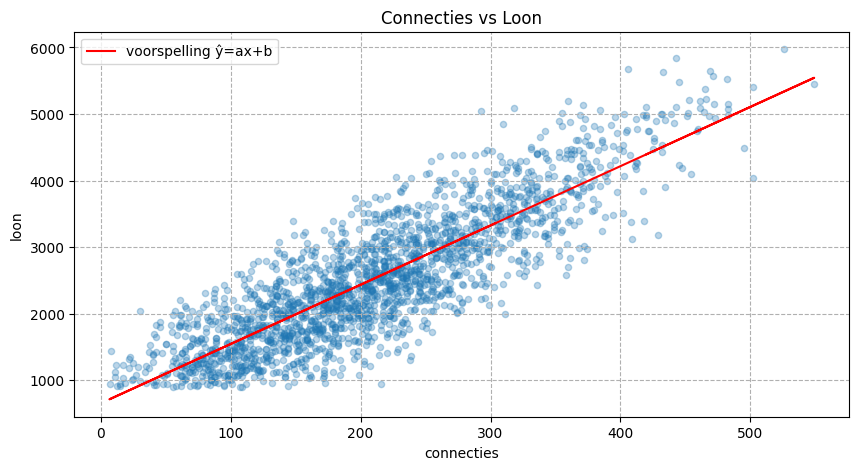

In [34]:
ax = linkedin.plot(kind='scatter', x='connecties', y='loon',
                   figsize=(10, 5), title='Connecties vs Loon',
                   marker='o', alpha=0.3)
ax.plot(X, y_hat, color='r', label='voorspelling ŷ=ax+b')
ax.grid(linestyle='--')
_ = ax.legend()

## Standaardschattingsfout of standard error $s_e$

$s_e=\sqrt{\frac{\sum_{i=1}^{n}(y - \hat{y})^2}{n}}$

of

$s_e=s_y\cdot\sqrt{1 - r_{xy}^2}$


In [48]:
from sklearn.metrics import mean_squared_error

# berekenen van standaardschattingsfout se
se = np.sqrt(np.sum((y - y_hat) ** 2) / len(y))
print(se)

# handmatig
r_xy = linkedin.corr().loc['connecties', 'loon']
sy = linkedin.loon.std()
se = sy * np.sqrt(1 - r_xy ** 2)
print(se)

# of met sklearn library
se = mean_squared_error(y, y_hat, squared=False)
print(se)

511.33018125890214
511.45409503298725
511.33018125890214


In [49]:
df = pd.DataFrame(zip(y, y_hat, y - y_hat), columns=['y', 'y_hat', 'y_error'])
df.y_error.std()

511.454095032988

## Betrouwbaarheidsinterval
In Data Science 2 leren we hoe we betrouwbaarheidsintervallen kunnen bereken. De $y_i$-waarden liggen met een bepaalde zekerheid tussen twee grenzen. Deze grenzen worden bepaald door bij elke voorspelde waarde $\hat{y}$ een hoeveelheid bij te tellen of af te trekken.


* $\hat{y} - 2\cdot s_e \leq y_i \leq \hat{y} + 2\cdot s_e$

* $(a \cdot x_i + b) - 2\cdot s_e \leq y_i \leq (a \cdot x_i + b) + 2\cdot s_e$

De factor 2 bepaalt dat we een betrouwbaarheidsinterval van 95.5% rond de waarde van de regresielijn willen hebben.


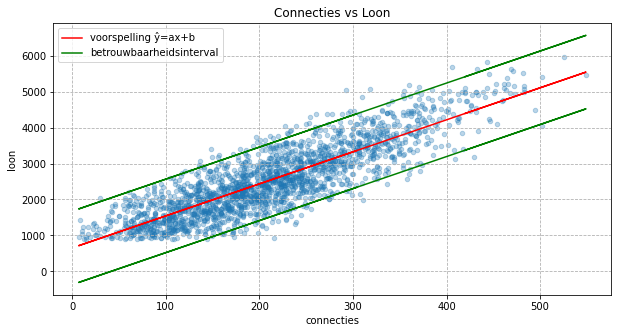

In [29]:
ax = linkedin.plot(kind='scatter', x='connecties', y='loon',
                   figsize=(10, 5), title='Connecties vs Loon',
                   marker='o', alpha=0.3)
ax.plot(X, y_hat, color='r', label='voorspelling ŷ=ax+b')
ax.plot(X, y_hat + 2 * se, color='g', label='betrouwbaarheidsinterval')
ax.plot(X, y_hat - 2 * se, color='g')
ax.grid(linestyle='--')
_ = ax.legend()


## Verklaarde variantie en R²

$s_{e}^2 = s_y^2⋅(1 − r_{xy}^2)$

en
<br>

$R^2 = r_{xy}^2$

Kwadraat van correlatiecoëfficiënt $R^2$ is dus het percentage van $y$ dat verklaard wordt door het model.


In [51]:
from sklearn.metrics import r2_score

r2_score(y, y_hat)  # kan je altijd gebruiken
# of
model.score(X, y)  # kan je gebruiken als je een model hebt


0.7303478133927426

0.7303478133927426

# Niet-lineaire regressie

* kwadratisch:   $y(x)= a \cdot x^2+b \cdot x+c$
* kubisch:       $y(x)= a \cdot x^3+b \cdot x^2+c \cdot x+d$
* logaritmisch:  $y(x)= a \cdot ln(x)+b$
* exponentieel:  $y(x)= e^{a \cdot x+b}$


## Kwadratische en kubische regressie

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# kwadratische regressie R² = 0.736
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X, y)
model.score(X, y)
print(np.flip(model[1].coef_), model[1].intercept_)

[0.00627406 6.02573581 0.        ] 925.4638079323595


In [32]:
# kubische regressie R² = 0.737
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X, y)
model.score(X, y)
print(np.flip(model[1].coef_), model[1].intercept_)

[-2.24601606e-05  2.26560281e-02  2.60022107e+00  0.00000000e+00] 1118.4251179467901


## Logaritmische regressie


In [33]:
# logaritmische regressie R² = 0.585
model = LinearRegression()
# X moet logaritmisch gemaakt worden
model.fit(np.log(X), y)

# voorspelling doen op logaritmisch gemaakte X
y_hat = model.predict(np.log(X))
r2_score(y, y_hat)

0.5850354366987527

## Exponentiele regressie


In [34]:
# exponentiele regressie R² = 0.712
model = LinearRegression()
# y moet logaritmisch gemaakt worden
model.fit(X, np.log(y))

# voorspelling nog exponentieel maken
y_hat = np.exp(model.predict(X))
r2_score(y, y_hat)

0.7108957495498925

# General Regression
<h2><font color="red">Deze klasse zal nog aangepast moeten worden zodat ze werkt met Pandas ipv Numpy arrays</font></h2>

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score as r2score


class GeneralRegression:
    def __init__(self, degree=1, exp=False, log=False):
        self.degree = degree
        self.exp = exp
        self.log = log
        self.model = None
        self.x_orig = None
        self.y_orig = None
        self.X = None
        self.y = None

    def fit(self, x: np.array, y: np.array):
        self.x_orig = x
        self.y_orig = y
        self.X = x.reshape(-1, 1)

        if self.exp:
            self.y = np.log(y)

        else:
            self.y = y

        if self.log:
            self.X = np.log(self.X)

        self.model = make_pipeline(PolynomialFeatures(degree=self.degree), LinearRegression())
        self.model.fit(self.X, self.y)

    def predict(self, x: np.array):
        X = x.reshape(-1, 1)

        if self.exp:
            return np.exp(self.model.predict(X))

        if self.log:
            return self.model.predict(np.log(X))

        return self.model.predict(X)

    @property
    def r2_score(self):
        return r2score(self.y_orig, self.predict(self.x_orig))

    @property
    def se_(self):
        if self.exp:
            return mean_squared_error(self.predict(self.X), np.exp(self.y), squared=False)
        if self.log:
            return mean_squared_error(self.predict(self.X), np.log(self.y), squared=False)
        return mean_squared_error(self.predict(self.X), self.y, squared=False)

    @property
    def coef_(self):
        return self.model.steps[1][1].coef_

    @property
    def intercept_(self):
        return self.model.steps[1][1].intercept_


In [53]:
models = pd.DataFrame([GeneralRegression(),
                       GeneralRegression(2),
                       GeneralRegression(3),
                       GeneralRegression(4),
                       GeneralRegression(5),
                       GeneralRegression(7),
                       GeneralRegression(log=True),
                       GeneralRegression(exp=True)])
models.index = ['Linear', 'Quadratic', 'Cubic', '4e', '5e', '7e', 'Logaritmic', 'Exponential']
models.columns = ['R²']
models.applymap(lambda model: model.fit(X, y))
models.applymap(lambda model: model.r2_score).sort_values(by='R²', ascending=False)


R²
7e           0.737063
5e           0.737046
4e           0.737008
Cubic        0.737006
Quadratic    0.735778
Linear       0.730348
Exponential  0.710896
Logaritmic   0.585035